In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#
def F(k,t):
    return  np.array( [[np.cos(k*t), np.sin(k*t)], [-np.sin(k*t), np.cos(k*t)]])

In [37]:
# classical dmd   
def toy_dmd(Xleft, Xright, k): 
    # compute svd
    U, s, Vt = np.linalg.svd(Xleft, False)
    
    # truncate
    U = U[:,0:k]
    s = s[0:k]
    Vt = Vt[0:k,:]
    
    # approximate A tilda : UtAU
    M = U.T.dot(Xright).dot(Vt.T).dot(np.diag(s**-1))

    eigs, w = np.linalg.eig(M)

    dmd_modes = Xright.dot(Vt.T.dot(np.diag(s**-1)).dot(w))
    
    return eigs

In [38]:
X = []
x0 = np.array([0,1])

#Generate Data
for i in np.arange(0,5000, 1):
    X.append(F(0.5,i).dot(x0) + np.random.standard_normal(2) * 0.01 )
X = np.asarray(X)

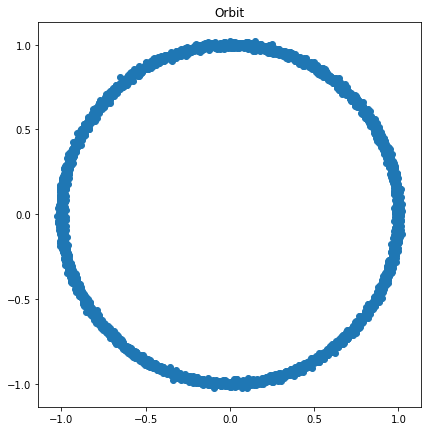

In [39]:
plt.figure(figsize=(6.1, 6.1))
plt.scatter(X[:,0],X[:,1])

plt.title('Orbit')
plt.tight_layout()
plt.show()

In [40]:
X.shape

(5000, 2)

In [41]:
# Rotate X from 2-dimensional space to high-dimensional(144) space
Q = np.random.standard_normal((144,2))
Q,_ = np.linalg.qr(Q)
Xr = X.dot(Q.T) # rotate

In [42]:
#DMD Approximation
Xr = Xr.T
eigs_approx = toy_dmd(Xr[:, :-1], Xr[:, 1:], k=30)

In [43]:
#Real Eigs
Atrue = np.array( [[np.cos(0.5), np.sin(0.5)], [-np.sin(0.5), np.cos(0.5)]])
eigs, _ = np.linalg.eig(Atrue)

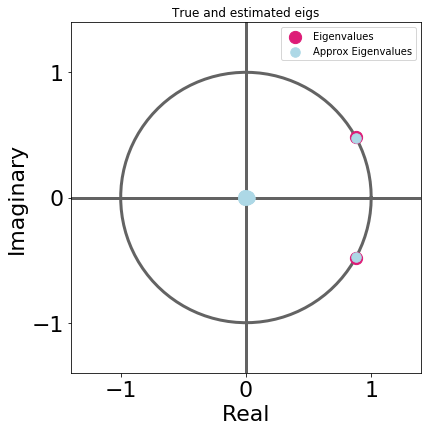

In [44]:
fig = plt.figure(figsize=(6.1, 6.1))
plt.scatter(eigs.real, eigs.imag, c = '#dd1c77', marker = 'o', s=25*6, zorder=2, label='Eigenvalues')
plt.scatter(eigs_approx.real, eigs_approx.imag, c = 'lightblue', marker = 'o', s=15*6, zorder=2, label='Approx Eigenvalues')
plt.legend()
maxeig = 1.4
plt.xlim([-maxeig, maxeig])
plt.ylim([-maxeig, maxeig])
plt.locator_params(axis='x',nbins=4)
plt.locator_params(axis='y',nbins=4)

plt.xlabel('Real', fontsize=22)
plt.ylabel('Imaginary', fontsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.tick_params(axis='x', labelsize=22)
plt.axhline(y=0,color='#636363',ls='-', lw=3, zorder=1 )
plt.axvline(x=0,color='#636363',ls='-', lw=3, zorder=1 )

t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), ls='-', lw=3, c = '#636363', zorder=1 )
plt.title('True and estimated eigs')
plt.tight_layout()

plt.show()


In [45]:
#Traditional bootstrap on eigenvalues of DMD with nboots trials
def eig_bootstrap(X, nboots=100):
    eig_boot = []    
    for i in range(nboots):
        idx = np.random.choice(range(X.shape[1]-1), X.shape[1]-1, True)
        idx = np.sort(idx)
        Xleft , Xright = X[:,idx], X[:,idx+1]
        eig_boot.append(toy_dmd(Xleft, Xright, k=30))
    eig_boot = np.asarray(eig_boot)
    return eig_boot

In [46]:
#Moving block bootstrap method, nboot trials; data is split into n − b + 1 overlapping blocks of length
def block_bootstrap(X, nboots=100):
    #Generating blocks
    n = X.shape[1]
    l = round(5*n**(1/3))
    N = n-l+1
    block = []
    for i in range(N):
        block.append(range(i, i+l))
    b = n//l
    eig_boot = []
    for i in range(nboots):
        idb = np.random.choice(range(len(block)), b, True)
        idx = np.sort([x for i in idb for x in block[i]])
        Xleft, Xright = X[:, idx], X[:, idx+1]
        eig_boot.append(toy_dmd(Xleft, Xright, k=30))
    eig_boot = np.asarray(eig_boot)
    return eig_boot

In [47]:
eig_block_boot = block_bootstrap(Xr, nboots=100)

IndexError: index 5000 is out of bounds for axis 1 with size 5000

In [48]:
eig_boot = eig_bootstrap(Xr, nboots=100)

In [49]:
def plot_eigs(true_eig, boot_eig):
    fig = plt.figure(figsize= (6, 6), facecolor="white",  edgecolor='k')
    plt.scatter(boot_eig.real, boot_eig.imag, c = 'lightblue', marker = 'o', s=25*6, zorder=2, label='Eigenvalues')
    plt.scatter(true_eig.real, true_eig.imag, c = '#dd1c77', marker = 'o', s=10*6, zorder=2, label='Eigenvalues')

    maxeig = 1.4
    plt.xlim([-maxeig, maxeig])
    plt.ylim([-maxeig, maxeig])
    plt.locator_params(axis='x',nbins=4)
    plt.locator_params(axis='y',nbins=4)

    plt.xlabel('Real', fontsize=22)
    plt.ylabel('Imaginary', fontsize=22)
    plt.tick_params(axis='y', labelsize=22)
    plt.tick_params(axis='x', labelsize=22)
    plt.axhline(y=0,color='#636363',ls='-', lw=3, zorder=1 )
    plt.axvline(x=0,color='#636363',ls='-', lw=3, zorder=1 )

    t = np.linspace(0,np.pi*2,100)
    plt.plot(np.cos(t), np.sin(t), ls='-', lw=3, c = '#636363', zorder=1 )
    plt.tight_layout()
    plt.show()

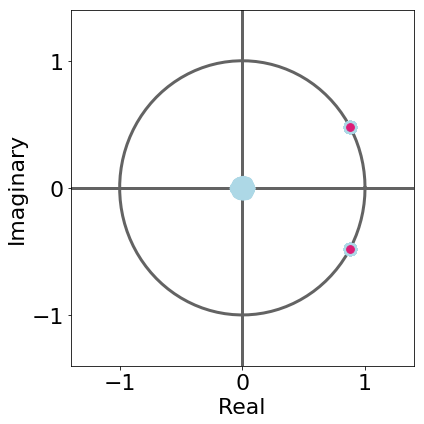

In [50]:
plot_eigs(eigs, eig_boot)

In [51]:
plot_eigs(eigs, eig_block_boot)

NameError: name 'eig_block_boot' is not defined

In [18]:
def percentile (data, ci=90):
    low = np.percentile(data, 5, axis=0)
    high = np.percentile(data, 95, axis=0)
    mean = np.percentile(data, 50, axis=0)
    return low, high, mean

In [19]:
low_real, high_real, mean_real = percentile(eig_boot.real)
low_imag, high_imag, mean_imag = percentile(eig_boot.imag)
low, high, mean = percentile(eig_boot)

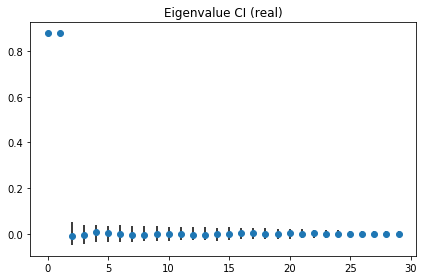

In [20]:
#Plot the 90% confidence interval of the real part of bootstrapped eigenvalues
plt.figure()
plt.vlines(range(eig_boot.real.shape[1]), low_real, high_real)
plt.plot(range(eig_boot.real.shape[1]), mean_real, 'o')
plt.title('Eigenvalue CI (real)')
plt.tight_layout()
plt.show()

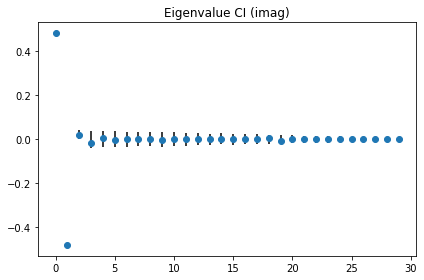

In [21]:
#Plot the 90% confidence interval of the imaginary part of bootstrapped eigenvalues
plt.figure()
plt.vlines(range(eig_boot.imag.shape[1]), low_imag, high_imag)
plt.plot(range(eig_boot.imag.shape[1]), mean_imag, 'o')
plt.title('Eigenvalue CI (imag)')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:5285: ComplexWarning: Casting complex v

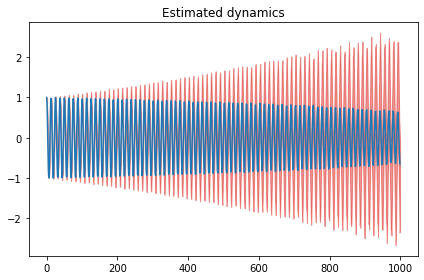

In [22]:
dyn = []
for i in range(eig_boot.shape[0]):
    dyn.append(np.vander(np.array([eig_boot[i,0]]),1000, increasing=True).flatten(-1))
dyn = np.asarray(dyn)

low_dyn, high_dyn, mean_dyn = percentile(dyn)
#Plot Estimated Dynamics
plt.figure()
plt.plot(range(1000), mean_dyn.flatten(-1))
plt.fill_between(range(1000), low_dyn.flatten(-1), high_dyn.flatten(-1), facecolor='b', color='#de2d26', alpha=0.5)
plt.title('Estimated dynamics')
plt.tight_layout()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  after removing the cwd from sys.path.


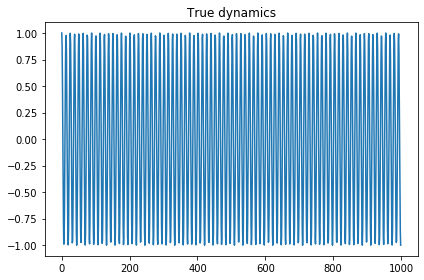

In [23]:
truth_dyn = np.vander(np.array([eigs[0]]),1000, increasing=True)
#Plot Known True Dynamics
plt.figure()
plt.plot(range(1000), truth_dyn.flatten(-1))
plt.title('True dynamics')
plt.tight_layout()